In [1]:
import pandas as pd
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from datetime import datetime, timedelta
from datetime import datetime, timezone
from dateutil.tz import tzutc, tzlocal

In [2]:
#path to script
script_path = Path(os.getcwd())

#folder data is in
Data = 'streamheight_files'

#path to data
data_path = list(script_path.parts) + [Data] ; data_path = Path((os.path.join(*data_path)))
print('path to stream event data:')
print(data_path)

#list of file names of data
data_file_list = sorted(os.listdir(data_path))

#create path to each stream file
stream_files_paths = []
for i in range(0,len(data_file_list)):
    stream_file = (os.path.join(*(list(data_path.parts) + ([data_file_list[i]]))))
    stream_files_paths.append(stream_file)

path to stream event data:
C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\Gage_Height_Analysis\streamheight_files


In [3]:
stream_files_paths

['C:\\Users\\bgorb\\OneDrive\\Documents\\WMS_GSSHA\\WMS_python\\Gage_Height_Analysis\\streamheight_files\\2010-04-07_2010-04-10GSSHA_stream_gage_manipulated.csv',
 'C:\\Users\\bgorb\\OneDrive\\Documents\\WMS_GSSHA\\WMS_python\\Gage_Height_Analysis\\streamheight_files\\2012-01-16_2012-01-19GSSHA_stream_gage.csv',
 'C:\\Users\\bgorb\\OneDrive\\Documents\\WMS_GSSHA\\WMS_python\\Gage_Height_Analysis\\streamheight_files\\2016-03-24_2016-03-27GSSHA_stream_gage.csv',
 'C:\\Users\\bgorb\\OneDrive\\Documents\\WMS_GSSHA\\WMS_python\\Gage_Height_Analysis\\streamheight_files\\2016-06-24_2016-06-26GSSHA_stream_gage.csv',
 'C:\\Users\\bgorb\\OneDrive\\Documents\\WMS_GSSHA\\WMS_python\\Gage_Height_Analysis\\streamheight_files\\2016-12-01_2016-12-04GSSHA_stream_gage_manipulated.csv',
 'C:\\Users\\bgorb\\OneDrive\\Documents\\WMS_GSSHA\\WMS_python\\Gage_Height_Analysis\\streamheight_files\\2017-11-29_2017-12-02GSSHA_stream_gage.csv',
 'C:\\Users\\bgorb\\OneDrive\\Documents\\WMS_GSSHA\\WMS_python\\Gage_H

In [4]:
peak = []
stream_data = []
height_event_dictionary =  {}
for i in stream_files_paths:
    print(i)
    df = pd.read_csv(i)
    df = df[['datetime', 'metric_height_m']]
    
    df['feet'] = df.metric_height_m * 3.28084
    df = df = df[['datetime', 'feet']]
    
    df['datetime'] = pd.to_datetime(df['datetime'])

    #get the top height date
    top_height = 0
    top_height_date = ''
    for i in range(len(df)):
        if df['feet'][i] > top_height:
            top_height = df['feet'][i]
            top_height_date = df['datetime'][i]

    #get the data from 12 hours before and after this date
    start = top_height_date - timedelta(days=0.5)
    end = top_height_date + timedelta(days=0.5)

    # Filter data between two dates
    filtered_df = df.loc[(df['datetime'] >= start) & (df['datetime'] <= end)]
    filtered_df = filtered_df.reset_index(drop = True)

    #create a column for accumulated time
    filtered_df['accumulated_time'] = np.nan

    #how much time from the start is the first data point?
    filtered_df['accumulated_time'][0] = filtered_df['datetime'][0] - start

    #calculate the accumulated time at each streamflow measurement
    for i in range(1, len(filtered_df)):
        filtered_df['accumulated_time'][i] = filtered_df['datetime'][i] - filtered_df['datetime'][i-1] + filtered_df['accumulated_time'][i-1]

    #if the last date doesn't match with the 24 hour mark...
    if filtered_df['datetime'][len(filtered_df) -1] != end:
        filtered_df = filtered_df.append({'datetime': end, 'feet': filtered_df['feet'][len(filtered_df) -1], 'accumulated_time' : end - filtered_df['datetime'][len(filtered_df) -1] + filtered_df['accumulated_time'][len(filtered_df) -1]}, ignore_index=True)

    #convert to hours
    for i in range(len(filtered_df)):
        filtered_df['accumulated_time'][i] = timedelta.total_seconds(filtered_df['accumulated_time'][i])/60/60

    height_event_dictionary[top_height] = filtered_df
    
#sort dictionary by maximum heights
myKeys = sorted(list(height_event_dictionary.keys()))
height_event_dictionary= {i: height_event_dictionary[i] for i in myKeys}

C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\Gage_Height_Analysis\streamheight_files\2010-04-07_2010-04-10GSSHA_stream_gage_manipulated.csv
C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\Gage_Height_Analysis\streamheight_files\2012-01-16_2012-01-19GSSHA_stream_gage.csv
C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\Gage_Height_Analysis\streamheight_files\2016-03-24_2016-03-27GSSHA_stream_gage.csv


C:\Users\bgorb\AppData\Local\Temp\ipykernel_15524\1894260218.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['accumulated_time'][0] = filtered_df['datetime'][0] - start
C:\Users\bgorb\AppData\Local\Temp\ipykernel_15524\1894260218.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['accumulated_time'][0] = filtered_df['datetime'][0] - start
C:\Users\bgorb\AppData\Local\Temp\ipykernel_15524\1894260218.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_df = filtered_df.append({'datetime': end, 

C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\Gage_Height_Analysis\streamheight_files\2016-06-24_2016-06-26GSSHA_stream_gage.csv
C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\Gage_Height_Analysis\streamheight_files\2016-12-01_2016-12-04GSSHA_stream_gage_manipulated.csv


C:\Users\bgorb\AppData\Local\Temp\ipykernel_15524\1894260218.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['accumulated_time'][0] = filtered_df['datetime'][0] - start
C:\Users\bgorb\AppData\Local\Temp\ipykernel_15524\1894260218.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_df = filtered_df.append({'datetime': end, 'feet': filtered_df['feet'][len(filtered_df) -1], 'accumulated_time' : end - filtered_df['datetime'][len(filtered_df) -1] + filtered_df['accumulated_time'][len(filtered_df) -1]}, ignore_index=True)
C:\Users\bgorb\AppData\Local\Temp\ipykernel_15524\1894260218.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\Gage_Height_Analysis\streamheight_files\2017-11-29_2017-12-02GSSHA_stream_gage.csv
C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\Gage_Height_Analysis\streamheight_files\2018-04-07_2018-04-10GSSHA_stream_gage_manipulated.csv


C:\Users\bgorb\AppData\Local\Temp\ipykernel_15524\1894260218.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['accumulated_time'][0] = filtered_df['datetime'][0] - start
C:\Users\bgorb\AppData\Local\Temp\ipykernel_15524\1894260218.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['accumulated_time'][0] = filtered_df['datetime'][0] - start
C:\Users\bgorb\AppData\Local\Temp\ipykernel_15524\1894260218.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\Gage_Height_Analysis\streamheight_files\2018-11-15_2018-11-19GSSHA_stream_gage.csv
C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\Gage_Height_Analysis\streamheight_files\2018-12-28_2018-12-31GSSHA_stream_gage.csv
C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\Gage_Height_Analysis\streamheight_files\2019-11-15_2019-11-19GSSHA_stream_gage.csv


C:\Users\bgorb\AppData\Local\Temp\ipykernel_15524\1894260218.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['accumulated_time'][0] = filtered_df['datetime'][0] - start
C:\Users\bgorb\AppData\Local\Temp\ipykernel_15524\1894260218.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['accumulated_time'][0] = filtered_df['datetime'][0] - start


C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\Gage_Height_Analysis\streamheight_files\2020-02-05_2020-02-08GSSHA_stream_gage_manipulated.csv
C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\Gage_Height_Analysis\streamheight_files\2020-03-27_2020-03-30GSSHA_stream_gage.csv


C:\Users\bgorb\AppData\Local\Temp\ipykernel_15524\1894260218.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['accumulated_time'][0] = filtered_df['datetime'][0] - start


In [5]:
dic_keys = list(height_event_dictionary.keys())

legends = []
for i in dic_keys:
    legends.append(str(float(round(i, 2))))


In [11]:
legends

['5.01',
 '6.02',
 '7.18',
 '8.18',
 '9.09',
 '10.01',
 '10.97',
 '11.87',
 '12.84',
 '13.66',
 '15.23',
 '17.68']

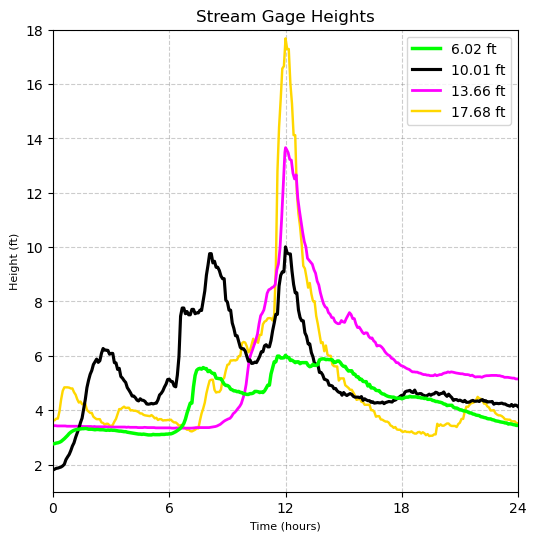

In [21]:
fig, axs= plt.subplots(1, figsize=(6,6))

a, = axs.plot(height_event_dictionary[dic_keys[1]]['accumulated_time'], height_event_dictionary[dic_keys[1]]['feet'], zorder =4, lw = 2.5 , c= 'lime')
b, = axs.plot(height_event_dictionary[dic_keys[5]]['accumulated_time'], height_event_dictionary[dic_keys[5]]['feet'], zorder = 3, lw = 2.25, c= 'black')
c, = axs.plot(height_event_dictionary[dic_keys[9]]['accumulated_time'], height_event_dictionary[dic_keys[9]]['feet'], zorder = 2, lw = 2, c= 'magenta')
d, = axs.plot(height_event_dictionary[dic_keys[11]]['accumulated_time'], height_event_dictionary[dic_keys[11]]['feet'], zorder = 1, lw = 1.75, c= 'gold')

axs.legend([a, b, c, d], ['6.02 ft', '10.01 ft', '13.66 ft', '17.68 ft'])


axs.set_title('Stream Gage Heights', fontsize = 12)
axs.set_xlabel('Time (hours)', fontsize = 8)
axs.set_ylabel('Height (ft)', fontsize = 8)
axs.set_ylim(1, 18)
axs.set_xlim(12, 24)


axs.set_xticks(np.linspace(0,24,5))

axs.grid()
plt.rc('axes', axisbelow=True)
axs.grid(True, color='gray', linestyle='dashed', alpha = 0.4)

NameError: name 'd' is not defined

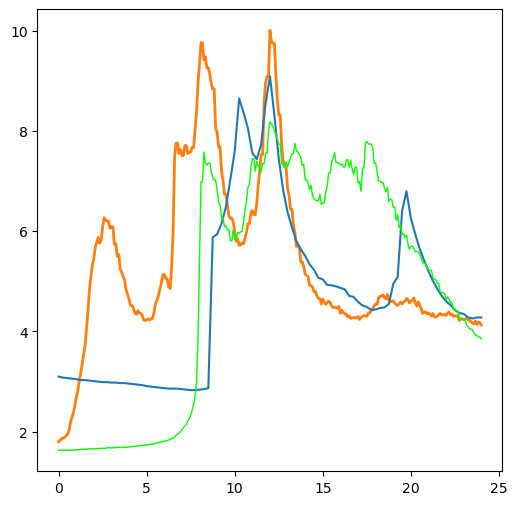

In [7]:
fig, axs= plt.subplots(1, figsize=(6,6))

a, = axs.plot(height_event_dictionary[dic_keys[3]]['accumulated_time'], height_event_dictionary[dic_keys[3]]['feet'], zorder =3, lw = 1 , c= 'lime')
b, = axs.plot(height_event_dictionary[dic_keys[4]]['accumulated_time'], height_event_dictionary[dic_keys[4]]['feet'], zorder = 2, lw = 1.5)
c, = axs.plot(height_event_dictionary[dic_keys[5]]['accumulated_time'], height_event_dictionary[dic_keys[5]]['feet'], zorder = 1, lw = 2)


axs.legend([a, b, c, d], legends[3:6])


axs.set_title('Stream Hydrograph Height', fontsize = 12)
axs.set_xlabel('Time (hours)', fontsize = 8)
axs.set_ylabel('Height (ft)', fontsize = 8)
axs.set_ylim(1, 11)
axs.set_xlim(12, 24)


axs.set_xticks(np.linspace(0,24,5))
axs.set_yticks(np.linspace(0,11,12))

axs.grid()
plt.rc('axes', axisbelow=True)
axs.grid(True, color='gray', linestyle='dashed', alpha = 0.4)

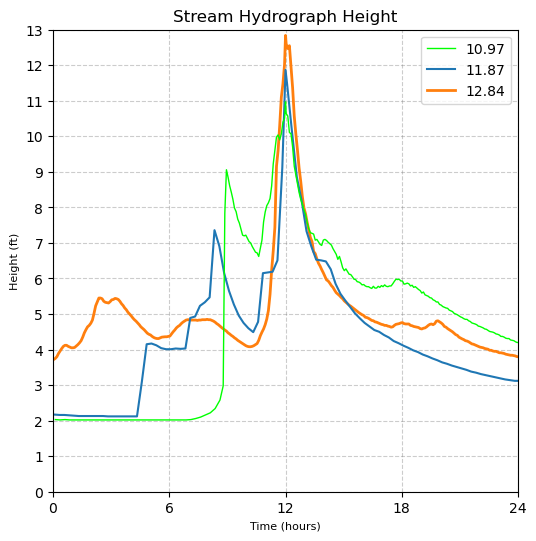

In [143]:
fig, axs= plt.subplots(1, figsize=(6,6))

a, = axs.plot(height_event_dictionary[dic_keys[6]]['accumulated_time'], height_event_dictionary[dic_keys[6]]['feet'], zorder =3, lw = 1 , c= 'lime')
b, = axs.plot(height_event_dictionary[dic_keys[7]]['accumulated_time'], height_event_dictionary[dic_keys[7]]['feet'], zorder = 2, lw = 1.5)
c, = axs.plot(height_event_dictionary[dic_keys[8]]['accumulated_time'], height_event_dictionary[dic_keys[8]]['feet'], zorder = 1, lw = 2)


axs.legend([a, b, c, d], legends[6:9])


axs.set_title('Stream Hydrograph Height', fontsize = 12)
axs.set_xlabel('Time (hours)', fontsize = 8)
axs.set_ylabel('Height (ft)', fontsize = 8)
axs.set_ylim(1, 13)
axs.set_xlim(12, 24)


axs.set_xticks(np.linspace(0,24,5))
axs.set_yticks(np.linspace(0,13,14))

axs.grid()
plt.rc('axes', axisbelow=True)
axs.grid(True, color='gray', linestyle='dashed', alpha = 0.4)

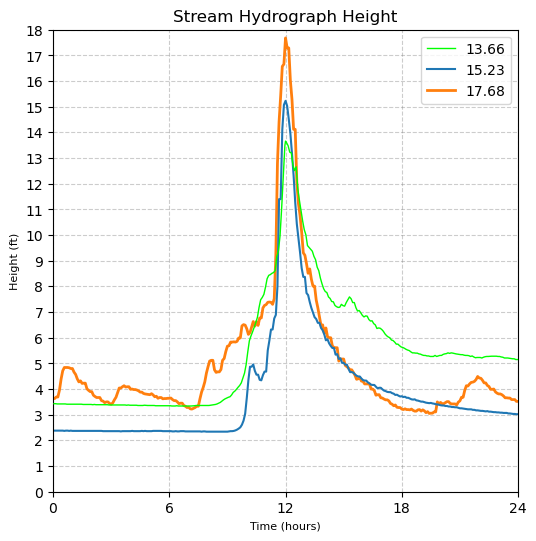

In [142]:
fig, axs= plt.subplots(1, figsize=(6,6))

a, = axs.plot(height_event_dictionary[dic_keys[9]]['accumulated_time'], height_event_dictionary[dic_keys[9]]['feet'], zorder =3, lw = 1 , c= 'lime')
b, = axs.plot(height_event_dictionary[dic_keys[10]]['accumulated_time'], height_event_dictionary[dic_keys[10]]['feet'], zorder = 2, lw = 1.5)
c, = axs.plot(height_event_dictionary[dic_keys[11]]['accumulated_time'], height_event_dictionary[dic_keys[11]]['feet'], zorder = 1, lw = 2)


axs.legend([a, b, c, d], legends[9:12])


axs.set_title('Stream Hydrograph Height', fontsize = 12)
axs.set_xlabel('Time (hours)', fontsize = 8)
axs.set_ylabel('Height (ft)', fontsize = 8)
axs.set_ylim(1, 18)
axs.set_xlim(12, 24)


axs.set_xticks(np.linspace(0,24,5))
axs.set_yticks(np.linspace(0,18,19))

axs.grid()
plt.rc('axes', axisbelow=True)
axs.grid(True, color='gray', linestyle='dashed', alpha = 0.4)